Prediction: [1, 1, 0, 1, 1]
Accuracy: 0.8


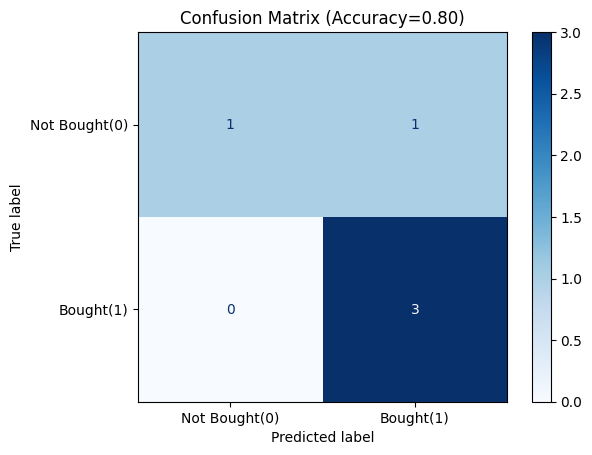

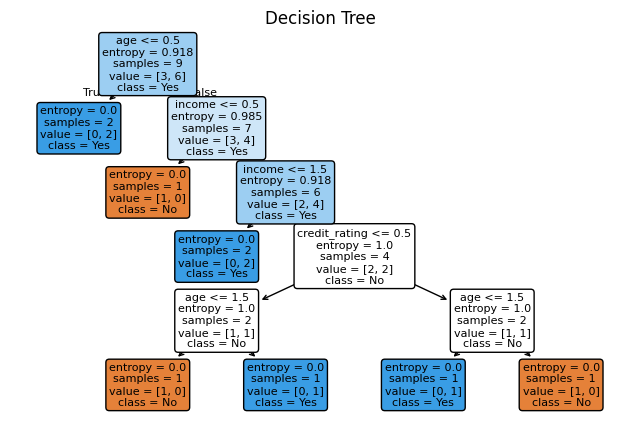

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.metrics import accuracy_score,ConfusionMatrixDisplay,confusion_matrix,classification_report
from sklearn.preprocessing import LabelEncoder

df=pd.read_csv('/content/ex4.csv')

label_encoders={}
for col in df.columns:
    if df[col].dtype=='object':
        le=LabelEncoder()
        df[col]=le.fit_transform(df[col].astype(str))

x=df.drop(columns=['buy_computer'])
y=df['buy_computer']

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

model=DecisionTreeClassifier(criterion='entropy',random_state=42)
model.fit(x_train,y_train)

test_prediction=model.predict(x_test)
print("Prediction:",test_prediction.tolist())
accuracy=accuracy_score(y_test,test_prediction)
print("Accuracy:",accuracy)

cm=confusion_matrix(y_test,test_prediction)
disp=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=["Not Bought(0)","Bought(1)"])
disp.plot(cmap=plt.cm.Blues)
plt.title(f"Confusion Matrix (Accuracy={accuracy:.2f})")
plt.show()

plt.figure(figsize=(8,5))
plot_tree(model,feature_names=x.columns,class_names=["No","Yes"],filled=True,fontsize=8,rounded=True)
plt.title("Decision Tree")
plt.show()

In [6]:
print("Classification Report")

print(classification_report(y,model.predict(x)))

Classification Report
              precision    recall  f1-score   support

           0       1.00      0.80      0.89         5
           1       0.90      1.00      0.95         9

    accuracy                           0.93        14
   macro avg       0.95      0.90      0.92        14
weighted avg       0.94      0.93      0.93        14

